This notebook will:
- Extract CSV Data: Obtain a CSV file of the respective holders using M1 Finance's built-in CSV export feature.
- Calculate Metrics: Add Beta and Standard Deviation to the data for the respective time frequencies.
- Export Portfolio Stats: Save the final portfolio statistics to a file upon completion.
- Plot Analysis: Visualize total risk and return over a specified time frame.
- Note: 
    - This notebook assumes you are using macOS 
    - That the file is downloaded to the Desktop, and relfects todays date

Libraries

In [16]:
from datetime import datetime, timedelta, date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.stock_utils import StockAnalysis, analyze_stocks
from utils.plotting_utils import risk_return_plot

Global Varibales

In [17]:
# Put user name here
user = 'blakeuribe'
sns.set_style('darkgrid')
plt.style.use('dark_background')

Time Variables

In [18]:
historical_years = 5
time_freq = '1d'

# Change start date accordingly 
todays_date = date.today()
start_date = datetime.now() - timedelta(days=historical_years*365)

Import Paths

In [19]:
# Asjust file path
formatted_date = todays_date.strftime('%b-%d-%Y')
file_path = f'/Users/{user}/Desktop/Holdings-{formatted_date}.csv'

try:
    raw_portfolio_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError('Enter User, or select updated CSV file from M1 Finance.')

Export Paths

In [20]:
export_path = f'data/portfolio_info_{todays_date}.csv'
figures_path = f'/Users/{user}/Desktop/opt_portfolio/figures'

Analysis

In [21]:
symbols = raw_portfolio_df['Symbol'].values
combined_summary_df = analyze_stocks(symbols, start_date, todays_date, time_freq)
portfolio_df = pd.merge(raw_portfolio_df, combined_summary_df, on='Symbol', how='outer')
portfolio_df = portfolio_df.copy().round(2)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Graphs

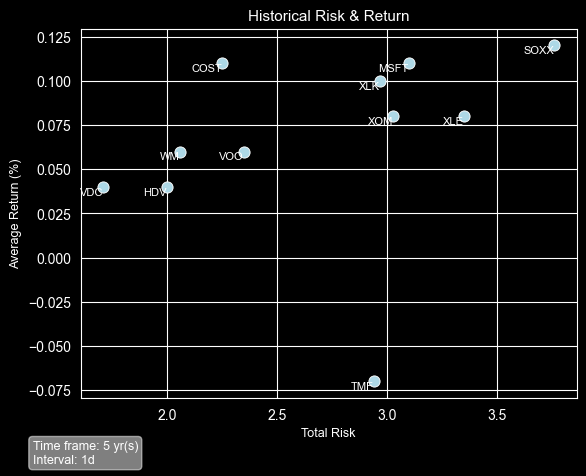

<Figure size 640x480 with 0 Axes>

In [22]:
plot = risk_return_plot(portfolio_df, 'Total_Risk', 'Average_Return(%)', historical_years=historical_years, time_freq=time_freq)
plt.savefig(f'{figures_path}/risk_return.png')

File Export

In [23]:
portfolio_df.to_csv(f'/Users/{user}/Desktop/opt_portfolio/data/portfolio_stats_{formatted_date}.csv')

In [24]:
portfolio_df

,Symbol,Name,Quantity,Avg. Price,Cost Basis,Unrealized Gain ($),Unrealized Gain (%),Value,Average_Return(%),Beta,Standard_Deviation(%),Total_Risk
0,COST,Costco Wholesale Corp.,0.77,529.48,407.5,250.48,61.47,657.98,0.11,0.73,1.52,2.25
1,HDV,iShares Core High Dividend ETF,53.55,97.62,"5,227.94",864.77,16.54,"6,092.71",0.04,0.78,1.22,2.00
2,MSFT,Microsoft,1.60,382.22,612.26,38.12,6.23,650.38,0.11,1.19,1.91,3.10
3,SOXX,iShares PHLX Semiconductor ETF,5.22,175.96,919.41,187.13,20.35,"1,106.54",0.12,1.46,2.30,3.76
4,TMF,Direxion Daily 20+ Year Treasury Bull 3X Shares,14.89,51.31,764.01,64.33,8.42,828.34,-0.07,-0.40,3.34,2.94
5,VDC,Vanguard Consumer Staples ETF,19.13,187.85,"3,593",406.57,11.32,"3,999.57",0.04,0.64,1.07,1.71
6,VOO,Vanguard S&P 500 ETF,17.94,413.51,"7,419.13","1,369.11",18.45,"8,788.24",0.06,1.01,1.34,2.35
7,WM,"Waste Management, Inc.",1.89,164.30,310.72,77.45,24.93,388.17,0.06,0.64,1.42,2.06
8,XLE,Energy Select Sector SPDR Fund,21.70,82.26,"1,785.22",155.14,8.69,"1,940.36",0.08,1.06,2.29,3.35
9,XLK,Technology Select Sector SPDR Fund,12.83,188.46,"2,418.19",220.31,9.11,"2,638.5",0.10,1.23,1.74,2.97


Financial Ratios

Profitability Ratios: These gauge a company's ability to generate profits from its operations.
- Gross Profit Margin:
    - (Gross Profit / Revenue) * 100%
    - This ratio measures the percentage of revenue that remains after deducting the cost of goods sold.
- Net Profit Margin: 
    - (Net Income / Revenue) * 100%
    - This ratio measures the percentage of revenue that remains after deducting all expenses.

In [28]:
import yfinance as yf

In [40]:
symbols

array(['VOO', 'HDV', 'VDC', 'XLK', 'XLE', 'SOXX', 'TMF', 'COST', 'MSFT',
       'XOM', 'WM'], dtype=object)

In [81]:
ticker = yf.Ticker("wm")
income_statement = ticker.quarterly_financials


net_income = income_statement.loc['Net Income']
revenue = income_statement.loc['Total Revenue']

income_statement

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31
Tax Effect Of Unusual Items,-13883668.903803,372000.0,-67119565.217391,0.0,-242274.412855,NaN
Tax Rate For Calcs,0.239374,0.186,0.271739,0.241,0.242274,NaN
Normalized EBITDA,1631000000.0,1511000000.0,1545000000.0,1518000000.0,1456000000.0,NaN
Total Unusual Items,-58000000.0,2000000.0,-247000000.0,0.0,-1000000.0,NaN
Total Unusual Items Excluding Goodwill,-58000000.0,2000000.0,-247000000.0,0.0,-1000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,680000000.0,708000000.0,493000000.0,663000000.0,615000000.0,NaN
Reconciled Depreciation,543000000.0,514000000.0,526000000.0,519000000.0,521000000.0,NaN
Reconciled Cost Of Revenue,3291000000.0,3140000000.0,3146000000.0,3188000000.0,3186000000.0,NaN
EBITDA,1573000000.0,1513000000.0,1298000000.0,1518000000.0,1455000000.0,NaN
EBIT,1030000000.0,999000000.0,772000000.0,999000000.0,934000000.0,NaN


In [87]:
income_statement = ticker.quarterly_financials.iloc[:, [0]]


net_income = income_statement.loc['Net Income']
revenue = income_statement.loc['Total Revenue']

income_statement

,2024-06-30
Tax Effect Of Unusual Items,-13883668.903803
Tax Rate For Calcs,0.239374
Normalized EBITDA,1631000000.0
Total Unusual Items,-58000000.0
Total Unusual Items Excluding Goodwill,-58000000.0
Net Income From Continuing Operation Net Minority Interest,680000000.0
Reconciled Depreciation,543000000.0
Reconciled Cost Of Revenue,3291000000.0
EBITDA,1573000000.0
EBIT,1030000000.0


gross prof margin = gross prof / rev

In [93]:
ratio_df = pd.DataFrame()

for stock in symbols:
    ticker = yf.Ticker(stock)
    error_list = []
    try:
        income_statement = ticker.quarterly_financials
        # income_statement = ticker.quarterly_financials.iloc[:, [0]]
        gross_prof_margin = (income_statement.loc['Gross Profit'] / income_statement.loc['Total Revenue']) * 100

        # Create a DataFrame with the computed ratios
        # Transpose and reset index for better readability

        gross_prof_margin_df = gross_prof_margin.reset_index()
        gross_prof_margin_df.columns = ['Date', 'Gross Profit Margin (%)']

        # Add the stock ticker to the DataFrame
        gross_prof_margin_df['Ticker'] = stock

        # Append to ratio_df
        ratio_df = pd.concat([ratio_df, gross_prof_margin_df], ignore_index=True)
    except KeyError:
        print(f'cant get {stock}')
ratio_df

cant get VOO
cant get HDV
cant get VDC
cant get XLK
cant get XLE
cant get SOXX
cant get TMF


,Date,Gross Profit Margin (%),Ticker
0,2024-05-31,12.54721,COST
1,2024-02-29,12.494439,COST
2,2023-11-30,12.702642,COST
3,2023-08-31,12.313305,COST
4,2023-05-31,12.065687,COST
5,2023-02-28,NaN,COST
6,2023-01-31,NaN,COST
7,2022-11-30,NaN,COST
8,2024-06-30,69.589198,MSFT
9,2024-03-31,70.08471,MSFT


In [64]:
error_list

[]

In [67]:
ratio_df.sort_values(by='Gross Profit Margin (%)', ascending=False)

,Date,Gross Profit Margin (%),Ticker
11,2023-09-30,71.155582,MSFT
12,2023-06-30,70.109808,MSFT
9,2024-03-31,70.08471,MSFT
8,2024-06-30,69.589198,MSFT
10,2023-12-31,68.360206,MSFT
22,2023-12-31,39.697144,WM
21,2024-03-31,39.135491,WM
20,2024-06-30,39.078119,WM
23,2023-09-30,38.668719,WM
24,2023-06-30,37.761282,WM
